<a href="https://colab.research.google.com/github/ydesquitado/APM1220/blob/main/APM1220_DESQUITADO_FA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **APM1220 Applied Multivatiate Analysis - Formative Assessment 3**
*2021025081 DESQUITADO, Yuichi P.*

For the Looks or Personality dataset, we ought to look for interaction between the ***Gender***, ***Personality***, and ***Looks***.

In this study, we identify the null hypothesis as:

$H_{0} : \mu_{1} \neq \mu_{2} \neq \mu_{3}$

Before diving into the ANOVA, we must first check the assumptions whether the dataset fits them.

Import necessary packages and load in the dataset. Forthis study, the student converted the `.sav` file into `.csv` for an easier manipulation and more familiar setup.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

path = '/content/drive/MyDrive/Colab Notebooks/Looksorpersonality.csv'
df = pd.read_csv(path)

In [ ]:
dfLong = pd.melt(df, id_vars=['Gender'],
                  value_vars=['att_high', 'av_high', 'ug_high', 'att_some', 'av_some', 'ug_some', 'att_none', 'av_none', 'ug_none'],
                  var_name='condition', value_name='rating')

# Extract Looks (attractive, average, ugly) and Personality (high, some, none)
dfLong['Looks'] = dfLong['condition'].str.split('_').str[0]  # att = attractive, av = average, ug = ugly
dfLong['Personality'] = dfLong['condition'].str.split('_').str[1]  # high, some, none

# Convert to readable labels
dfLong['Looks'] = dfLong['Looks'].replace({'att': 'Attractive', 'av': 'Average', 'ug': 'Ugly'})
dfLong['Personality'] = dfLong['Personality'].replace({'high': 'High Charisma', 'some': 'Some Charisma', 'none': 'No Charisma'})

In [ ]:
# Perform ANOVA with interaction between Gender, Looks, and Personality
model = ols('rating ~ C(Gender) * C(Looks) * C(Personality)', data=dfLong).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

                                         sum_sq     df           F  \
C(Gender)                              0.200000    1.0    0.006599   
C(Looks)                           20779.633333    2.0  342.828397   
C(Personality)                     23233.600000    2.0  383.314649   
C(Gender):C(Looks)                  3944.100000    2.0   65.070902   
C(Gender):C(Personality)            4420.133333    2.0   72.924637   
C(Looks):C(Personality)             4055.266667    4.0   33.452481   
C(Gender):C(Looks):C(Personality)   2669.666667    4.0   22.022466   
Residual                            4909.600000  162.0         NaN   

                                         PR(>F)  
C(Gender)                          9.353544e-01  
C(Looks)                           6.093858e-59  
C(Personality)                     3.762559e-62  
C(Gender):C(Looks)                 1.809781e-21  
C(Gender):C(Personality)           2.602120e-23  
C(Looks):C(Personality)            2.479356e-20  
C(Gender):C(Looks):

In [ ]:
# Check normality of residuals
shapiro_test = stats.shapiro(model.resid)
print('Shapiro-Wilk test for normality:', shapiro_test)

# Check homogeneity of variances (Levene's test)
levene_test = stats.levene(dfLong['rating'][dfLong['Looks'] == 'Attractive'],
                           dfLong['rating'][dfLong['Looks'] == 'Average'],
                           dfLong['rating'][dfLong['Looks'] == 'Ugly'],
                           center='mean')
print('Levene’s test for homogeneity of variances:', levene_test)

Shapiro-Wilk test for normality: ShapiroResult(statistic=0.9824753968155903, pvalue=0.02329298198510948)
Levene’s test for homogeneity of variances: LeveneResult(statistic=2.4596118470944823, pvalue=0.08838498592499769)


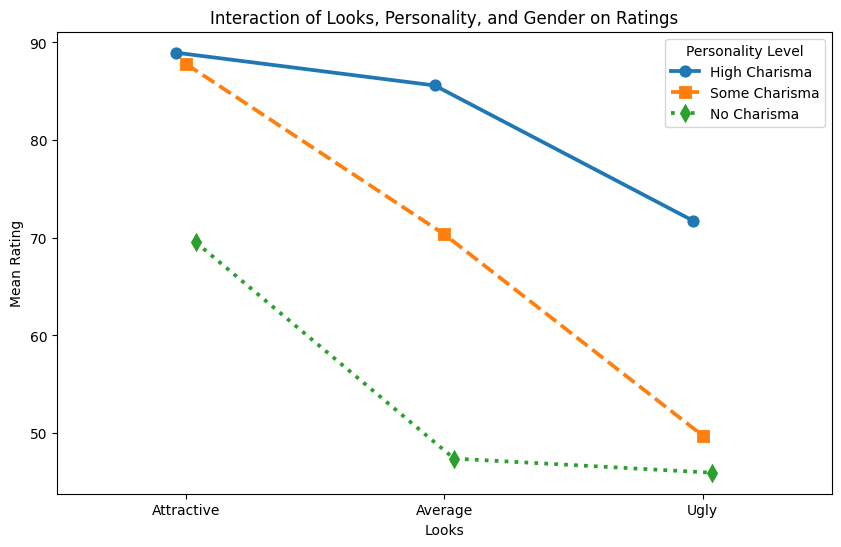

In [ ]:
# Plot interaction effects between Looks, Personality, and Gender
plt.figure(figsize=(10, 6))
sns.pointplot(data=dfLong, x='Looks', y='rating', hue='Personality',
              linestyles=["-", "--", ":"], markers=["o", "s", "d"], dodge=True, errorbar=None) # Added a third value to markers and linestyles
plt.title('Interaction of Looks, Personality, and Gender on Ratings')
plt.ylabel('Mean Rating')
plt.xlabel('Looks')
plt.legend(title='Personality Level')
plt.show()